In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
sns.set()

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [ ]:
csv_url = 'https://raw.githubusercontent.com/ExplodingKetchup/SC1015/main/google%20play.csv?token=GHSAT0AAAAAACAE6GJKVB6IT7XN2J43YMBGZBQAAEQ'
df_raw = pd.read_csv(csv_url)
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Check the data types of the columns

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Drop duplicates
df_raw.drop_duplicates(inplace=True)
df_raw.shape

(10358, 13)

In [ ]:
# Dropping columns we don't need

df = df_raw.drop(['App', 'Current Ver', 'Android Ver', 'Last Updated'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10358 non-null  object 
 1   Rating          8893 non-null   float64
 2   Reviews         10358 non-null  object 
 3   Size            10358 non-null  object 
 4   Installs        10358 non-null  object 
 5   Type            10357 non-null  object 
 6   Price           10358 non-null  object 
 7   Content Rating  10357 non-null  object 
 8   Genres          10358 non-null  object 
dtypes: float64(1), object(8)
memory usage: 809.2+ KB


In [ ]:
# Dropping null rows

df = df.dropna()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8892 non-null   object 
 1   Rating          8892 non-null   float64
 2   Reviews         8892 non-null   object 
 3   Size            8892 non-null   object 
 4   Installs        8892 non-null   object 
 5   Type            8892 non-null   object 
 6   Price           8892 non-null   object 
 7   Content Rating  8892 non-null   object 
 8   Genres          8892 non-null   object 
dtypes: float64(1), object(8)
memory usage: 694.7+ KB


Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [ ]:
# Genres are a bit messy, so we'll clean them up

# What's the max and min number of genres in a single app?
max_genre_count = df['Genres'].apply(lambda x: len(x.split(';'))).max()
min_genre_count = df['Genres'].apply(lambda x: len(x.split(';'))).min()
print(max_genre_count)
print(min_genre_count)

2
1


In [ ]:
# Check if Category is the same as the first genre, if false, what's the difference?
df_genres_compare = df['Genres'].apply(lambda x: x.split(';')[0].upper().replace(' ', '_').replace('&', 'AND'))
df_genres_compare = df_genres_compare == df['Category']

# View rows where the comparison is false
df[df_genres_compare == False]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1653,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure
1654,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade
1655,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual
1656,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card
1657,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual
...,...,...,...,...,...,...,...,...,...
10820,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education
10827,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education
10834,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education


In [ ]:
# It's reasonable to split the genres into 2 columns:
# 1. Primary Genre
# 2. Secondary Genre

df['Primary Genre'] = df['Genres'].apply(lambda x: x.split(';')[0])
df['Secondary Genre'] = df['Genres'].apply(lambda x: x.split(';')[1] if len(x.split(';')) > 1 else None)

# Drop the original Genres column
df = df.drop('Genres', axis = 1)

df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary Genre,Secondary Genre
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,None
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,None
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,None
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,Creativity


In [ ]:
# Revews column
# Convert to int
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
df_copy = df.copy()

In [ ]:
# Process Size column

# Drop 'Varies with device' rows
df_copy = df_copy[df_copy['Size'] != 'Varies with device']

# Convert Size to MB
def convert_size_to_mb(value):
    if pd.isnull(value):
        return value
    elif 'M' in value:
        return float(value.replace('M', '').strip())
    elif 'k' in value:
        return float(value.replace('k', '').strip()) / 1024
    else:
        return value

df_copy['Size'] = df_copy['Size'].apply(convert_size_to_mb)

df_copy.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary Genre,Secondary Genre
0,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,None
1,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design,Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,None
3,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,None
4,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design,Creativity


In [ ]:
# Installs column

# val contains the unique values in the Installs column, sorted in ascending order
val = df_copy["Installs"].unique()
for i in range(len(val)):
    val[i] = int(val[i].replace('+', '').replace(',', ''))
val = np.sort(val)

# Create encoding dictionary
install_encoding = {}
for value in df_copy["Installs"].unique():
    install_encoding[value] = np.where(val == int(value.replace('+', '').replace(',', '')))[0][0]

# Encode Installs column
df_copy["Installs"] = df_copy["Installs"].map(install_encoding)

df_copy.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary Genre,Secondary Genre
0,ART_AND_DESIGN,4.1,159,19.0,8,Free,0,Everyone,Art & Design,None
1,ART_AND_DESIGN,3.9,967,14.0,11,Free,0,Everyone,Art & Design,Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,13,Free,0,Everyone,Art & Design,None
3,ART_AND_DESIGN,4.5,215644,25.0,15,Free,0,Teen,Art & Design,None
4,ART_AND_DESIGN,4.3,967,2.8,10,Free,0,Everyone,Art & Design,Creativity


In [ ]:
# Price column

# Drop '$' and convert to float
df_copy['Price'] = df_copy['Price'].apply(lambda x: float(x.replace('$', '')))
df_copy.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Primary Genre,Secondary Genre
0,ART_AND_DESIGN,4.1,159,19.0,8,Free,0.0,Everyone,Art & Design,None
1,ART_AND_DESIGN,3.9,967,14.0,11,Free,0.0,Everyone,Art & Design,Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,13,Free,0.0,Everyone,Art & Design,None
3,ART_AND_DESIGN,4.5,215644,25.0,15,Free,0.0,Teen,Art & Design,None
4,ART_AND_DESIGN,4.3,967,2.8,10,Free,0.0,Everyone,Art & Design,Creativity


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Rating           7424 non-null   float64
 2   Reviews          7424 non-null   int64  
 3   Size             7424 non-null   float64
 4   Installs         7424 non-null   int64  
 5   Type             7424 non-null   object 
 6   Price            7424 non-null   float64
 7   Content Rating   7424 non-null   object 
 8   Primary Genre    7424 non-null   object 
 9   Secondary Genre  386 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 638.0+ KB


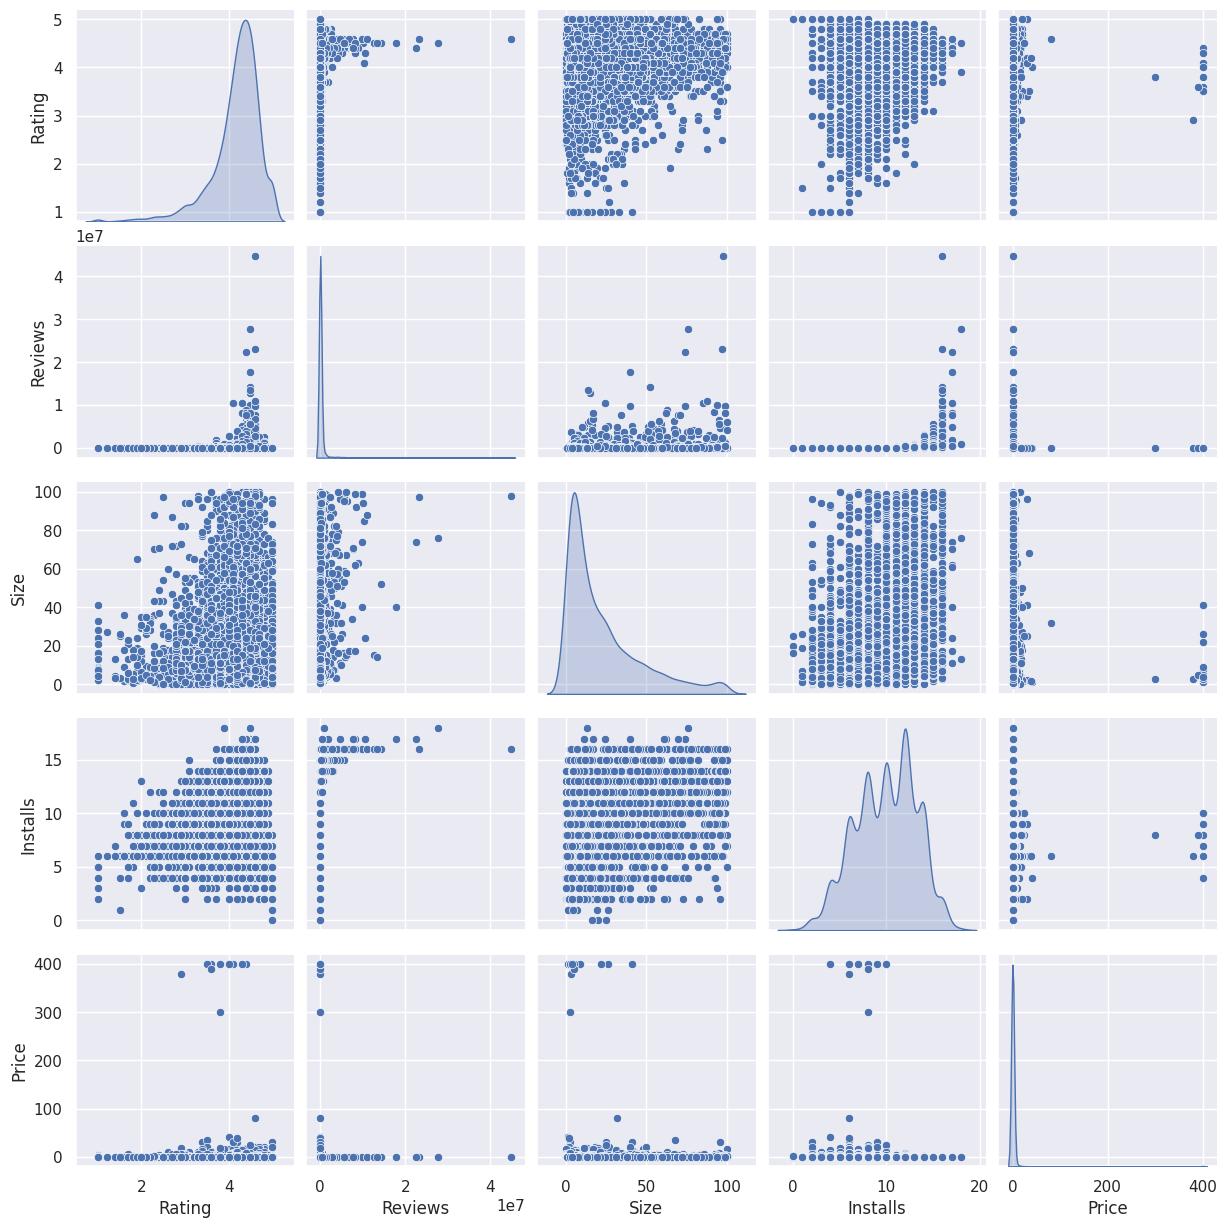

In [ ]:
# Visualize numerical variables with pairplot
sns.pairplot(df_copy[['Rating', 'Reviews', 'Size', 'Installs', 'Price']], diag_kind='kde')

In [ ]:
# Checking some descriptive statistics
df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,7424.0,4.171309,5.497294e-01,1.000000,4.0,4.3,4.50,5.0
Reviews,7424.0,278773.976024,1.743621e+06,1.000000,99.0,2067.0,36894.75,44893888.0
Size,7424.0,22.747273,2.343512e+01,0.008301,5.1,14.0,33.00,100.0
Installs,7424.0,9.931843,3.211682e+00,0.000000,8.0,10.0,12.00,18.0
Price,7424.0,1.116599,1.770857e+01,0.000000,0.0,0.0,0.00,400.0


<Axes: xlabel='Secondary Genre', ylabel='Rating'>

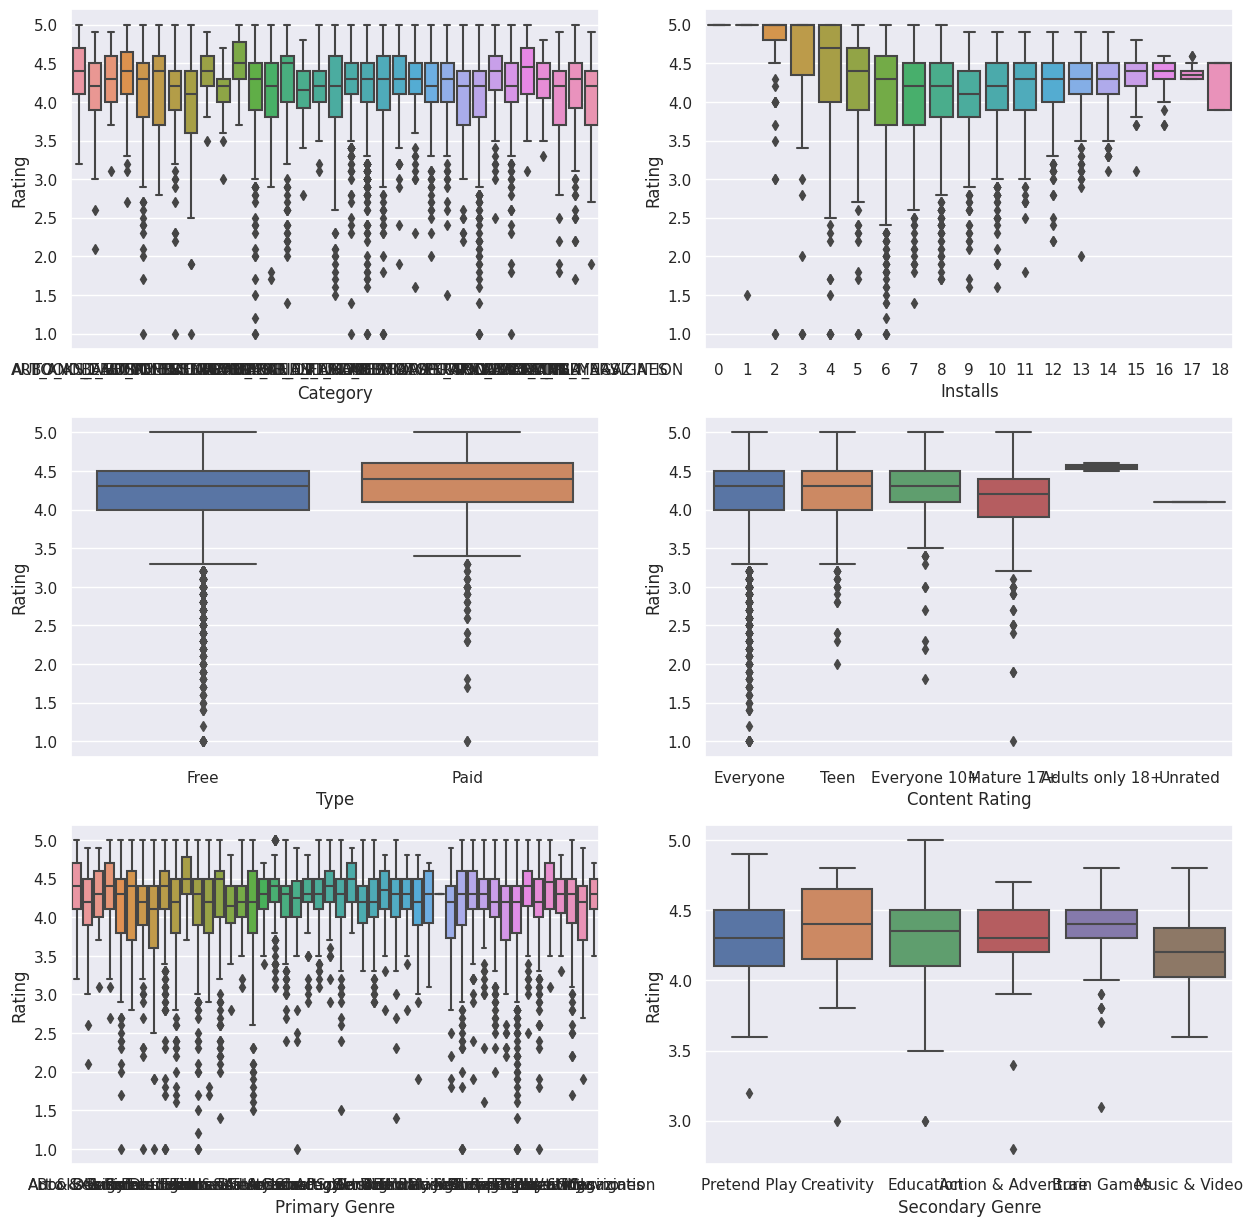

In [ ]:
# Plot relationship between categorical variables and Rating
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.boxplot(x='Category', y='Rating', data=df_copy, ax=ax[0, 0])
sns.boxplot(x='Installs', y='Rating', data=df_copy, ax=ax[0, 1])
sns.boxplot(x='Type', y='Rating', data=df_copy, ax=ax[1, 0])
sns.boxplot(x='Content Rating', y='Rating', data=df_copy, ax=ax[1, 1])
sns.boxplot(x='Primary Genre', y='Rating', data=df_copy, ax=ax[2, 0])
sns.boxplot(x='Secondary Genre', y='Rating', data=df_copy, ax=ax[2, 1])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Rating           7424 non-null   float64
 2   Reviews          7424 non-null   int64  
 3   Size             7424 non-null   float64
 4   Installs         7424 non-null   int64  
 5   Type             7424 non-null   object 
 6   Price            7424 non-null   float64
 7   Content Rating   7424 non-null   object 
 8   Primary Genre    7424 non-null   object 
 9   Secondary Genre  386 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 638.0+ KB


In [ ]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through the columns in the DataFrame
for col in df_copy.columns:
    # Check if the column has a non-numeric data type
    if df_copy[col].dtype == 'object':
        # Apply label encoding to the column
        df_copy[col] = le.fit_transform(df_copy[col])


In [ ]:
# Split data into train and test sets

y = df_copy['Rating']
X = df_copy.drop('Rating', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=42)

# Train the model using the training data
rf_regressor.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.24209258201254544
R-squared Score: 0.16788846205377772
Mean Squared Error: 0.3096820656662307
R-squared Score: 0.1061519423030296


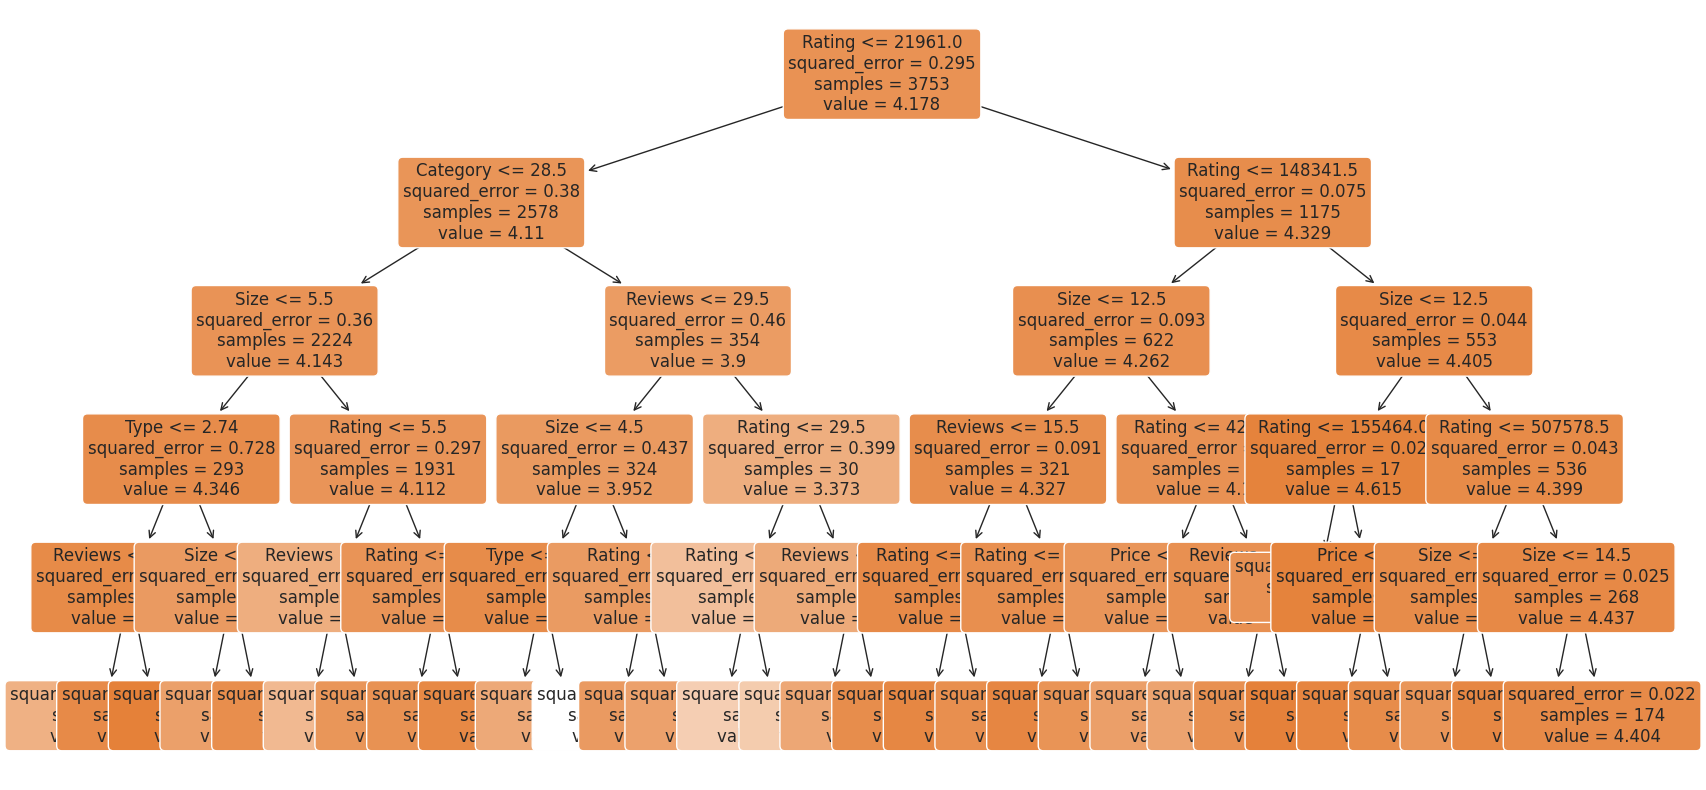

In [ ]:
# Choose a tree (e.g., the first tree) from the Random Forest
tree_to_visualize = rf_regressor.estimators_[0]

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the chosen tree
plot_tree(tree_to_visualize, filled=True, feature_names=df_copy.columns, rounded=True, fontsize=12)

# Show the plot
plt.show()

In [ ]:
X_train['Reviews'] = (X_train['Reviews'] - X_train['Reviews'].mean()) / X_train['Reviews'].std()
X_train['Size'] = (X_train['Size'] - X_train['Size'].mean()) / X_train['Size'].std()
X_train['Price'] = (X_train['Price'] - X_train['Price'].mean()) / X_train['Price'].std()
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Primary Genre,Secondary Genre
9375,28,-0.136152,1.370467,13,0,-0.063586,1,40,6
3025,28,-0.135859,0.093942,12,0,-0.063586,1,40,6
7549,23,-0.154410,-0.923024,10,0,-0.063586,1,31,6
6782,6,-0.144728,-0.888983,13,0,-0.063586,1,13,6
1709,14,2.958612,3.115052,16,0,-0.063586,1,40,6
